# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

In [1]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,0
48,14.10,2.02,2.40,18.8,103,2.75,2.92,0.32,2.38,6.20,1.07,2.75,1060,0
54,13.74,1.67,2.25,16.4,118,2.60,2.90,0.21,1.62,5.85,0.92,3.20,1060,0
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,2
132,12.81,2.31,2.40,24.0,98,1.15,1.09,0.27,0.83,5.70,0.66,1.36,560,2
45,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080,0
88,11.64,2.06,2.46,21.6,84,1.95,1.69,0.48,1.35,2.80,1.00,2.75,680,1
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,0
21,12.93,3.80,2.65,18.6,102,2.41,2.41,0.25,1.98,4.50,1.03,3.52,770,0
170,12.20,3.03,2.32,19.0,96,1.25,0.49,0.40,0.73,5.50,0.66,1.83,510,2


## explot data if there is NaN in dataset

In [2]:
print(data.isnull().sum())


Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64


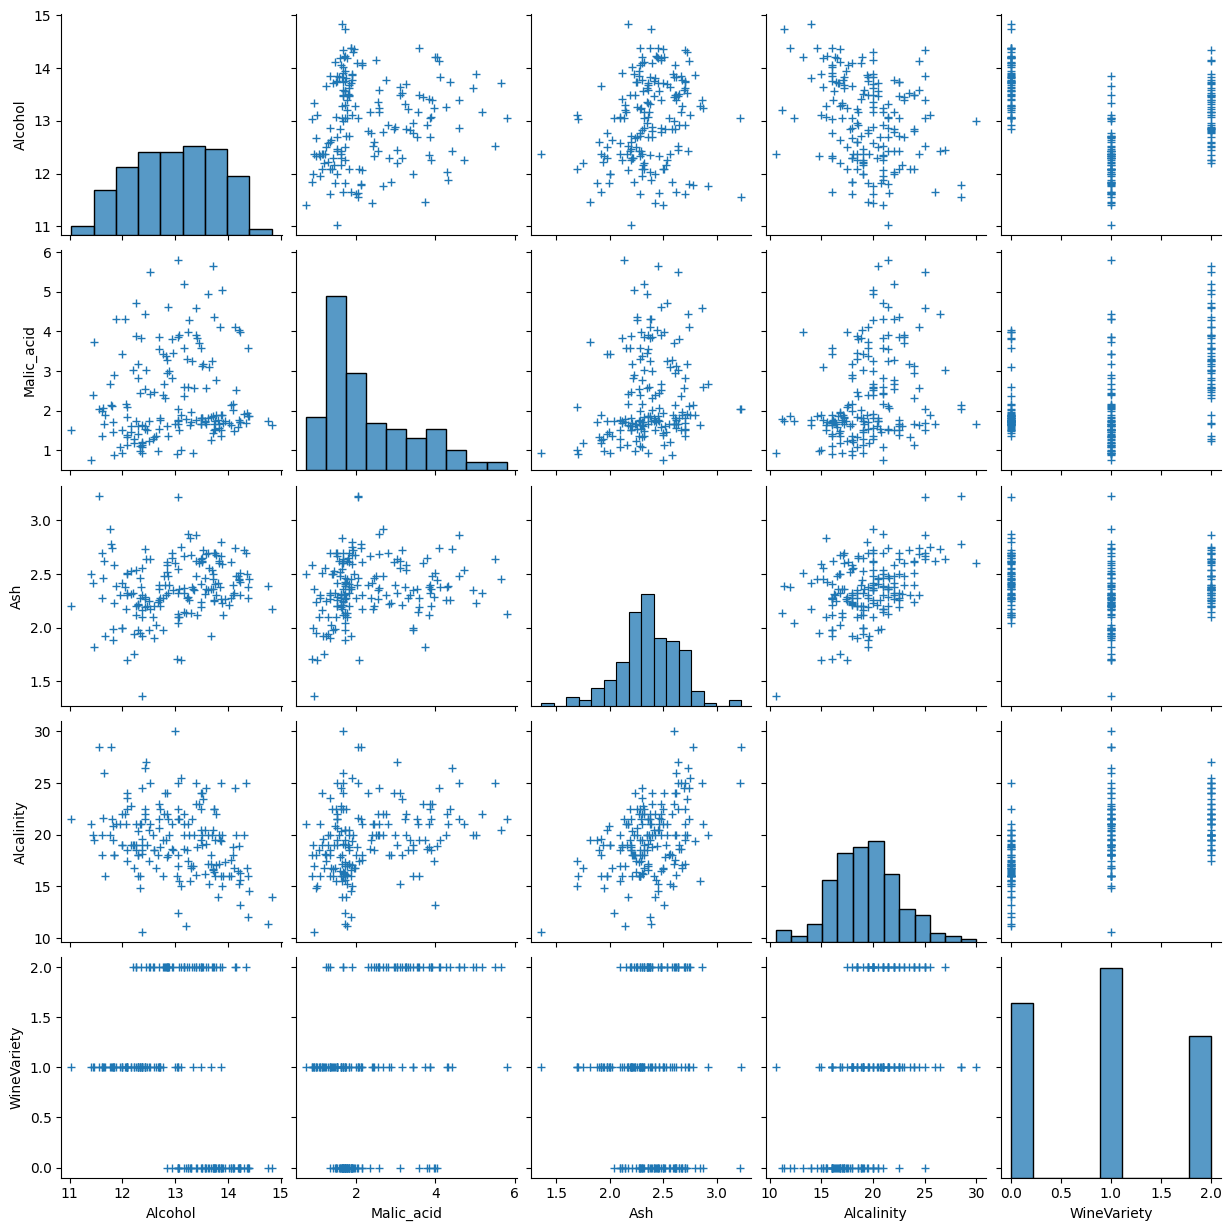

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_features = ['Alcohol','Malic_acid','Ash','Alcalinity']
sns.pairplot(data[numeric_features + ['WineVariety']], plot_kws=dict(marker="+", linewidth=1))

# numeric_features = ['Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity']
# sns.pairplot(data[numeric_features + ['WineVariety']], plot_kws=dict(marker="+", linewidth=1))

# numeric_features = ['Hue','OD280_315_of_diluted_wines','Proline','Proanthocyanins','Color_intensity']
# sns.pairplot(data[numeric_features + ['WineVariety']], plot_kws=dict(marker="+", linewidth=1))

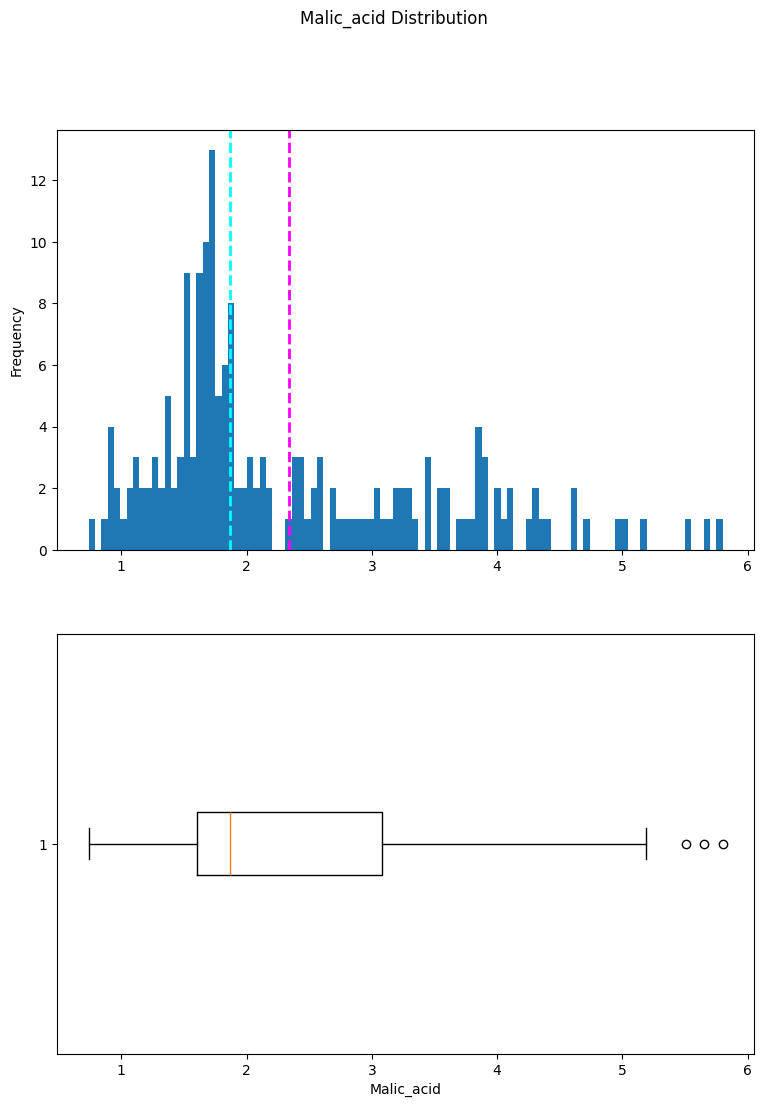

In [9]:
# Get the label column
label = data['Malic_acid']


# Create a figure for 2 subplots (2 rows, 1 column)
fig, ax = plt.subplots(2, 1, figsize = (9,12))

# Plot the histogram   
ax[0].hist(label, bins=100)
ax[0].set_ylabel('Frequency')

# Add lines for the mean, median, and mode
ax[0].axvline(label.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(label.median(), color='cyan', linestyle='dashed', linewidth=2)

# Plot the boxplot   
ax[1].boxplot(label, vert=False)
ax[1].set_xlabel('Malic_acid')

# Add a title to the Figure
fig.suptitle('Malic_acid Distribution')

# Show the figure
plt.show()

Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

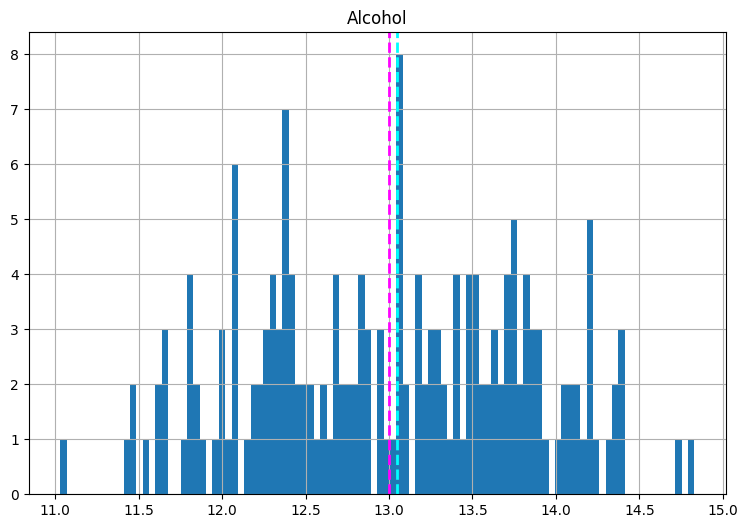

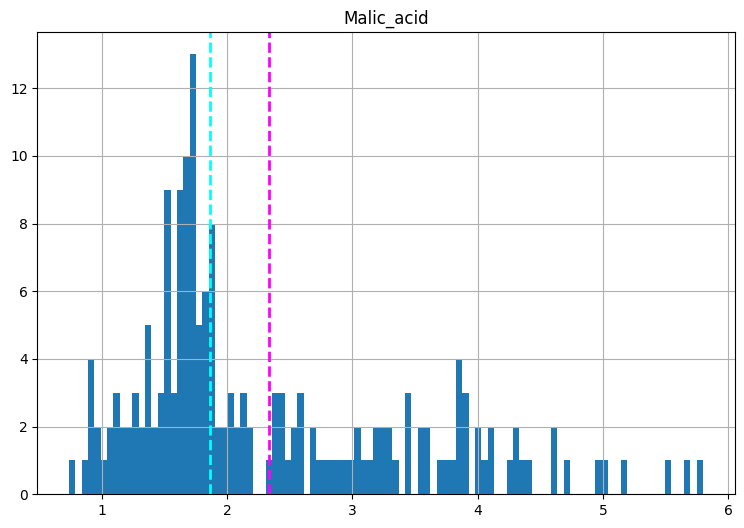

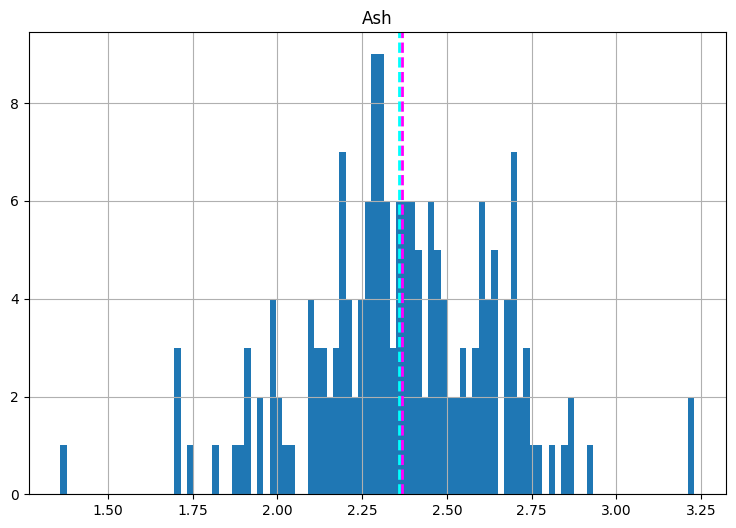

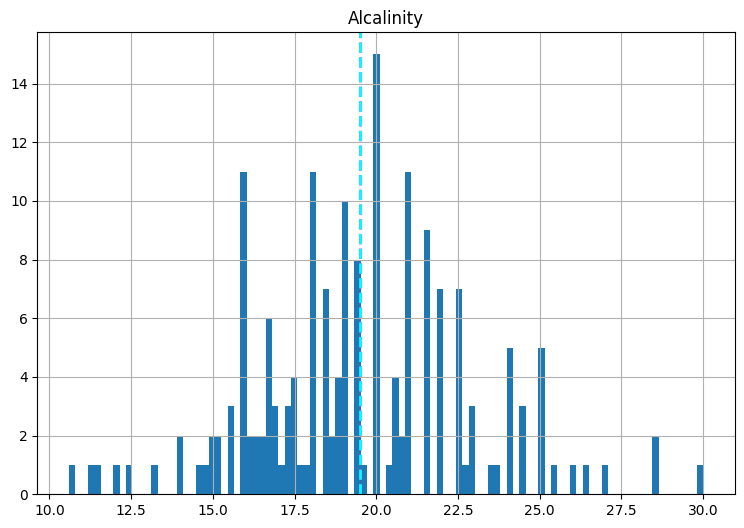

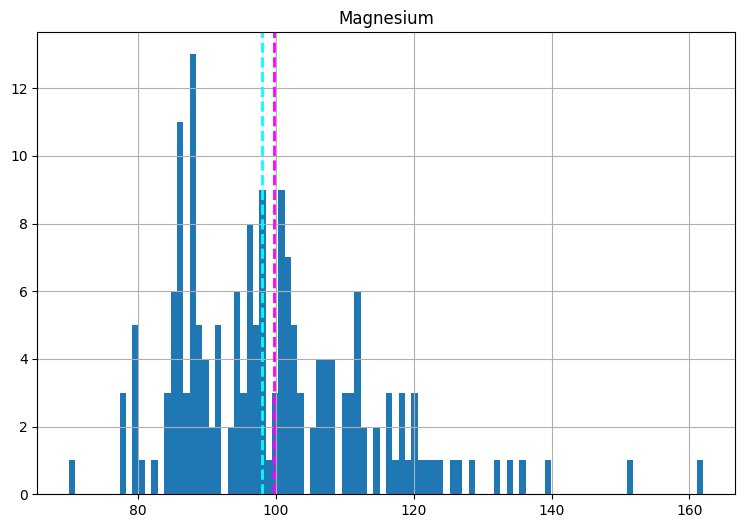

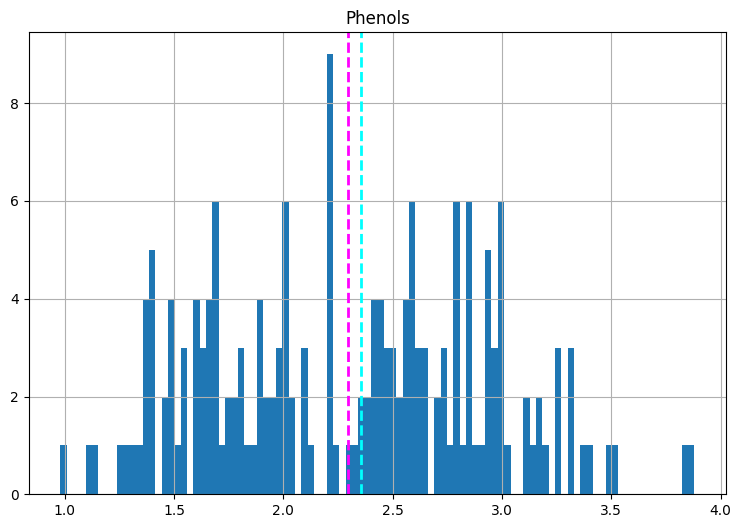

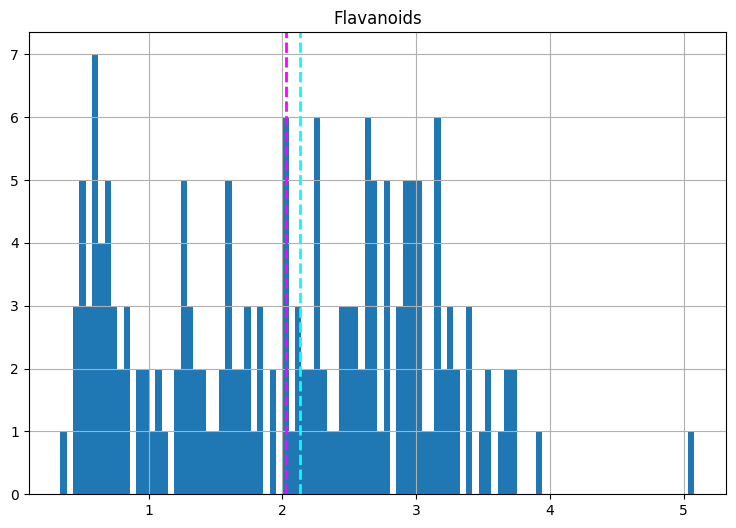

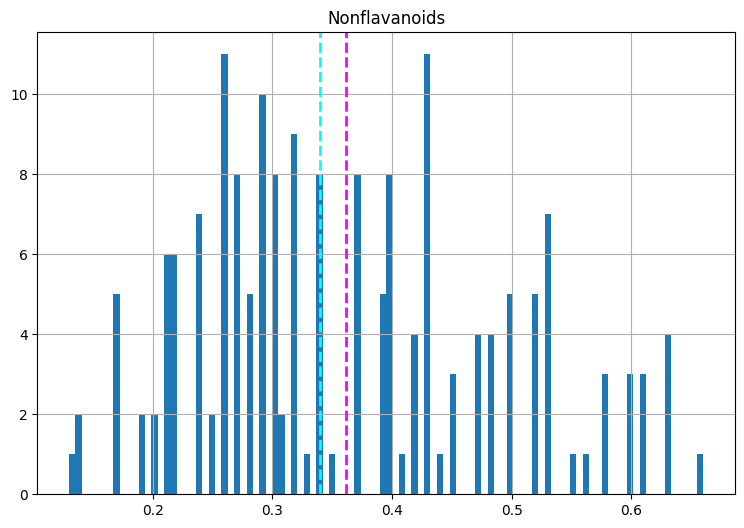

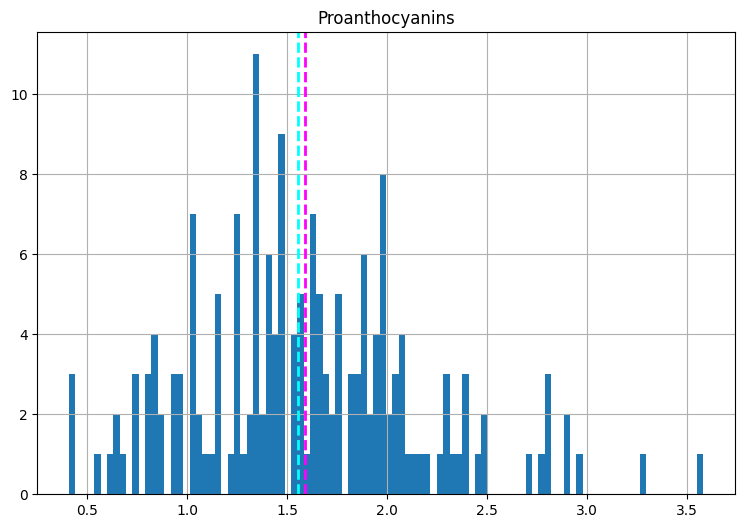

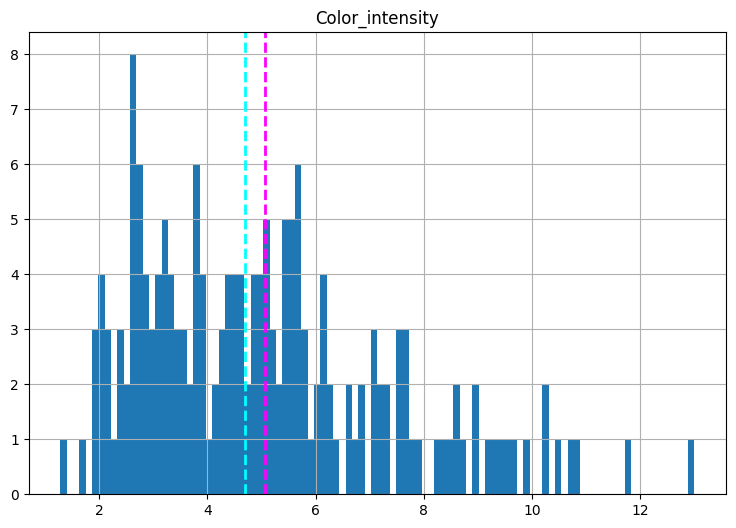

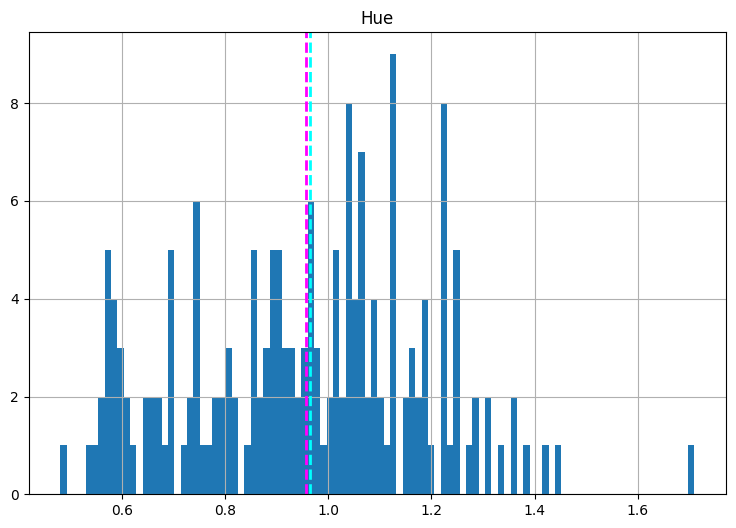

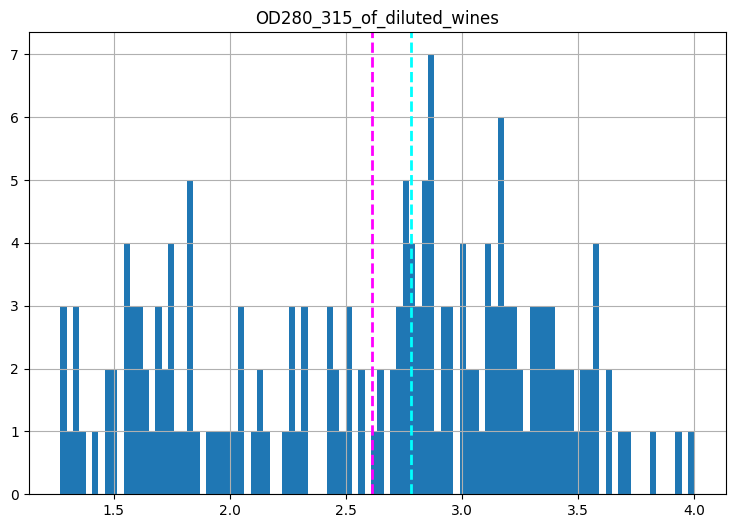

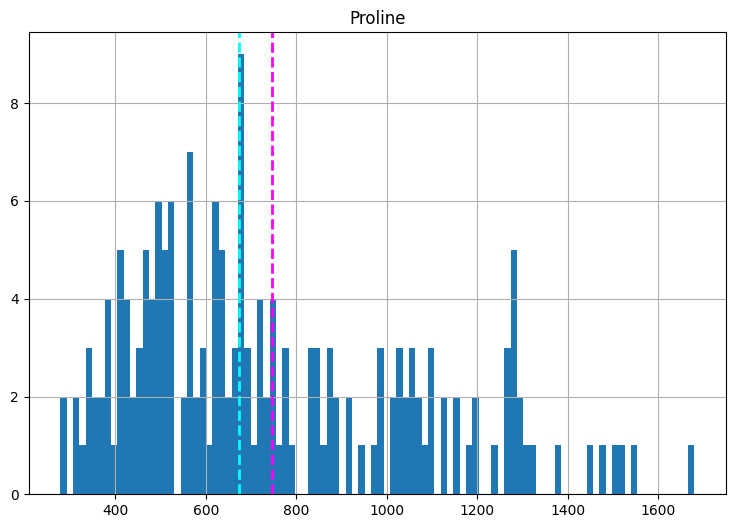

In [17]:

numeric_features = data.columns[:-1]

# Plot a histogram for each numeric feature
for col in numeric_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = data[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [10]:
# Your code to evaluate data, and train and evaluate a classification model

# Separate features and labels
X, y = data[['Alcohol','Malic_acid', 'Ash','Alcalinity','Magnesium'\
             ,'Phenols','Flavanoids','Nonflavanoids','Proanthocyanins'\
            ,'Color_intensity','Hue','OD280_315_of_diluted_wines'\
            ,'Proline']].values, data['WineVariety'].values



In [11]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=166)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 142 rows
Test Set: 36 rows


In [32]:
# one hot encoding fro local_convenience_stores
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.1

# Define preprocessing for numeric columns (scale them)
numeric_features = [0,1,2,3,4,5,6,7,8,9,10,11,12]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = []
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline

# To see the preprocessor result
# pipeline = Pipeline(steps=[('preprocessor', preprocessor)])
# model = pipeline.fit_transform(X_train)
# print(model)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=10000))
                           ])

# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))

print (model)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [])])),
                ('regressor',
                 LogisticRegression(C=10.0, max_iter=10000,
                                    multi_class='auto'))])


/Users/liuhui/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


### Evaluate model

Overall Accuracy: 0.9722222222222222
Overall Precision: 0.9523809523809524
Overall Recall: 0.9803921568627452


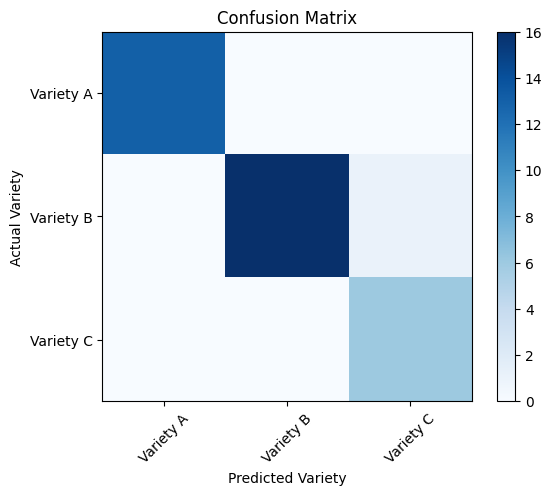

[[13  0  0]
 [ 0 16  1]
 [ 0  0  6]]


In [34]:
from sklearn. metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get predictions from test data
predictions = model.predict(X_test)

# Get metrics
print("Overall Accuracy:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))

# Plot confusion matrix
cm = confusion_matrix(y_test, predictions)
classes = ['Variety A','Variety B','Variety C']
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.title('Confusion Matrix')
plt.xlabel("Predicted Variety")
plt.ylabel("Actual Variety")
plt.show()

print(cm)

Average AUC: 1.0


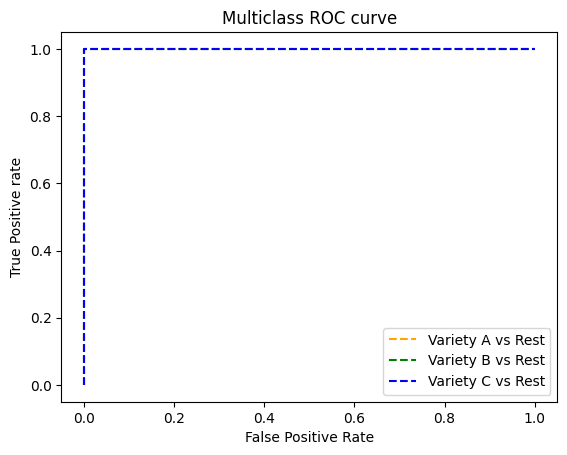

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get class probability scores
probabilities = model.predict_proba(X_test)

auc = roc_auc_score(y_test,probabilities, multi_class='ovr')
print('Average AUC:', auc)

# Get ROC metrics for each class
fpr = {}
tpr = {}
thresh ={}
for i in range(len(classes)):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, probabilities[:,i], pos_label=i)
    
# Plot the ROC chart
plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label=classes[0] + ' vs Rest')
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label=classes[1] + ' vs Rest')
plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label=classes[2] + ' vs Rest')
plt.title('Multiclass ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.show()

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [38]:
import joblib

# Save the model as a pickle file
filename = './03 - wine_classifer.pkl'
joblib.dump(model, filename)

# Load the saved model
model = joblib.load(filename)


# Your code to predict classes for the two new samples
new_X = [[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
        [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520]]


# Get predictions from test data
predictions = model.predict(new_X)
predictions

array([0, 1])